In [25]:
import pandas as pd
import numpy as np
import json
import plotly.graph_objects as go

In [1]:
yard_json_path = '/Users/yaseen/Downloads/yard-veenendaal - COMPLETE- rotate - 20220310.json'

In [3]:
with open(yard_json_path, 'r') as f:
    yard_json = json.loads(f.read())

In [ ]:
filter(lambda )

In [15]:
[a for a in [2,3,4,5,6] if a > 3]

[4, 5, 6]

In [36]:
objects_coords = {i: {'left':yard_json['objects'][i]['left'],
     'top':yard_json['objects'][i]['top'],
     'angle':yard_json['objects'][i]['angle'],
    } for i in range(len(yard_json['objects'])) }#if yard_json['objects'][i]['type'] == 'rect'}

In [38]:
lefts = [a['left'] for a in objects_coords.values()]
tops = [a['top'] for a in objects_coords.values()]
angles = [a['angle'] for a in objects_coords.values()]

In [39]:
df = pd.DataFrame({'left':lefts,'top':tops,'angle':angles}, index = list(range(len(lefts))))

In [73]:
(df.left.round(-1).value_counts()>3).value_counts(normalize=True)

False    0.677966
True     0.322034
Name: left, dtype: float64

In [136]:
round(1.574 *rounding_factor, 1)/rounding_factor

1.6

In [162]:
rounding_factor = -1
rounded_df = (df.left.round(rounding_factor)).value_counts()
frequencies = rounded_df[rounded_df>5]
frequencies

1540.0    40
2280.0    37
2880.0    20
2970.0    19
2800.0    14
940.0     13
630.0     13
710.0     13
2910.0    13
2850.0    11
1030.0    10
550.0      8
2960.0     6
2860.0     6
Name: left, dtype: int64

In [163]:
rounded_left = np.where(df.left.round(rounding_factor).isin(frequencies.index), df.left.round(rounding_factor), df.left)

In [164]:
sum(abs(rounded_left - df.left))/len(df.left)

1.3663636363636358

In [165]:
fig = go.Figure()
fig.add_trace(go.Scatter(x  = rounded_left, y=-df.top, mode="markers", text = [str(i) for i in df.index]))
fig.show()

In [53]:
fig = go.Figure()
fig.add_trace(go.Scatter(x  = df.left, y=-df.top, mode="markers", text = [str(i) for i in df.index]))
fig.show()

(1000, 2) (1000,)
Counter({0: 334, 1: 333, 2: 333})
[-3.05837272  4.48825769] 0
[-8.60973869 -3.72714879] 1
[1.37129721 5.23107449] 0
[-9.33917563 -2.9544469 ] 1
[-8.63895561 -8.05263469] 2
[-8.48974309 -9.05667083] 2
[-7.51235546 -7.96464519] 2
[-7.51320529 -7.46053919] 2
[-0.61947075  3.48804983] 0
[-10.91115591  -4.5772537 ] 1


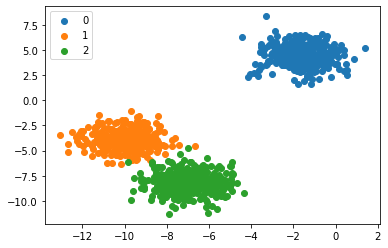

In [50]:
from numpy import where
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot
# define dataset
X, y = make_blobs(n_samples=1000, centers=3, random_state=1)
# summarize dataset shape
print(X.shape, y.shape)
# summarize observations by class label
counter = Counter(y)
print(counter)
# summarize first few examples
for i in range(10):
	print(X[i], y[i])
# plot the dataset and color the by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()